Scikit-learn is a free machine learning library for Python. It features various algorithms like support vector machine, random forests, and k-neighbours, and it also supports Python numerical and scientific libraries like NumPy and SciPy

In this tutorial we will learn to code python and apply Machine Learning with the help of the scikit-learn library, which was created to make doing machine learning in Python easier and more robust.

To do this, we’ll be using the Sales_Win_Loss data set from IBM’s Watson repository. We will import the data set using pandas, explore the data using pandas methods like head(), tail(), dtypes(), and then try our hand at using plotting techniques from Seaborn to visualize our data.

Then we’ll dive into scikit-learn and use preprocessing.LabelEncoder() in scikit-learn to process the data, and train_test_split() to split the data set into test and train samples. We will also use a cheat sheet to help us decide which algorithms to use for the data set. Finally we will use three different algorithms (Naive-Bayes, LinearSVC, K-Neighbors Classifier) to make predictions and compare their performance using methods like accuracy_score() provided by the scikit-learn library. We will also visualize the performance score of different models using scikit-learn and Yellowbrick visualization

For this tutorial, we will use the Sales-Win-Loss data set available on the IBM Watson website. This data set contains the sales campaign data of an automotive parts wholesale supplier.

We will use scikit-learn to build a predictive model to tell us which sales campaign will result in a loss and which will result in a win.

In [3]:
#import necessary modules
import pandas as pd

#store the url in a variable
url = "https://raw.githubusercontent.com/vkrit/data-science-class/master/WA_Fn-UseC_-Sales-Win-Loss.csv"

In [4]:
# Read in the data with `read_csv()`
sales_data = pd.read_csv(url)

In [5]:
# Using .head() method to view the first few records of the data set
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [6]:
# Using head() method with an argument which helps us to restrict the number of initial records that should be displayed
sales_data.head(n=2)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1


In [7]:
# Using .tail() method to view the last few records from the dataframe
sales_data.tail()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
78020,10089932,Batteries & Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,250000,1,1,3,Unknown,0.0,0.0,0.0,6
78021,10089961,Shelters & RV,Performance & Non-auto,Northeast,Reseller,0,Won,1,0,0,180000,1,1,0,Unknown,0.0,0.0,0.0,5
78022,10090145,Exterior Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4
78023,10090430,Exterior Accessories,Car Accessories,Southeast,Fields Sales,0,Loss,2,0,0,120000,1,1,0,Unknown,1.0,0.0,0.0,5
78024,10094255,Interior Accessories,Car Accessories,Mid-Atlantic,Reseller,0,Loss,1,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4


In [8]:
# Using .tail() method with an argument which helps us to restrict the number of initial records that should be displayed
sales_data.tail(n=2)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
78023,10090430,Exterior Accessories,Car Accessories,Southeast,Fields Sales,0,Loss,2,0,0,120000,1,1,0,Unknown,1.0,0.0,0.0,5
78024,10094255,Interior Accessories,Car Accessories,Mid-Atlantic,Reseller,0,Loss,1,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4


In [9]:
# using the dtypes() method to display the different datatypes available
sales_data.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

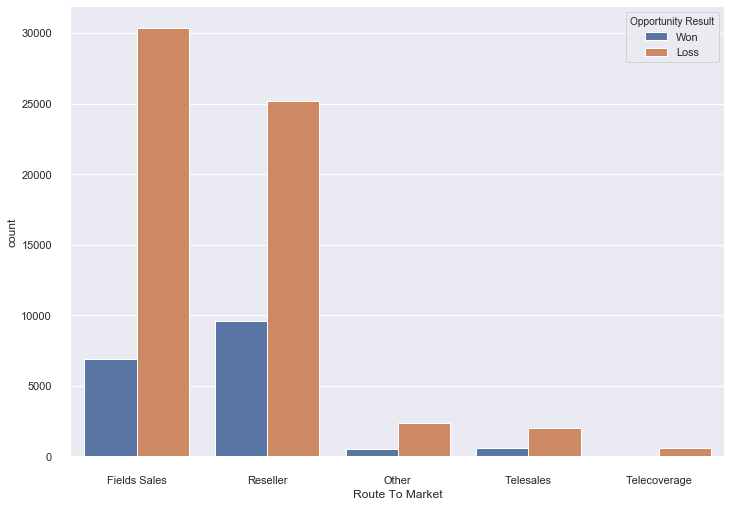

In [12]:
# import the seaborn module
import seaborn as sns

# import the matplotlib module
import matplotlib.pyplot as plt

# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)

# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

# create a countplot
sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')

# Remove the top and down margin
sns.despine(offset=10, trim=True)

# display the plotplt.show()
plt.show()

we create the plot using sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result'). The countplot() method helps us to create a countplot and it exposes several arguments to customize the countplot per our needs. Here, in the first argument of the countplot() method, we defined the X-axis as the column ‘Route To Market’ from our data set. The second argument is the data source, which in this case is the dataframe sales_data that we created in the first section of this tutorial. The third argument is the color of the barplots which we assigned to ‘blue’ for the label ‘won’ and ‘green’ for the label ‘loss’ from the ‘Opportunity Result’ column of the sales_data dataframe.

The first thing is that the data set has more records of the type ‘loss’ than records of the type ‘won’, as we can see from the size of the bars. Looking at the x axis and the corresponding bars for each label on the x axis, we can see that most of the data from our data set is concentrated towards the left side of the plot: towards the ‘Field Sales’ and ‘Reseller’ categories. Another thing to notice is that the category ‘Field Sales’ has more losses than the category ‘Reseller’.

We selected the Route To Market column for our plot because it seemed like it would provide helpful information after our initial study of the head() and tail() methods’ output. But other fields like ‘Region’ , ‘Supplies Group’ etc. can also be used to make plots in the same manner.

Another popular option is violinplots, so let’s create a violin plot and see what that style of plot can tell us.

We will use the violinplot() method provided by the Seaborn module to create the violin plot. Let’s first import the seaborn module and use the set() method to customize the size of our plot. We will seet the size of the plot as 16.7px by 13.27px:

In [13]:
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(16.7,13.27)})

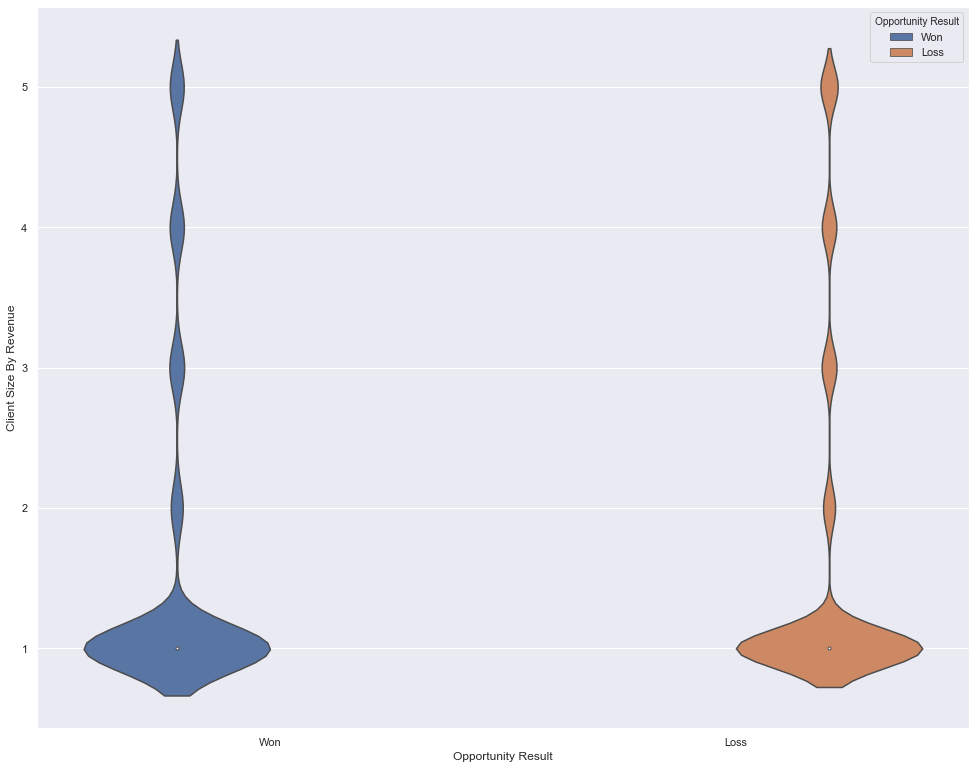

In [14]:
# plotting the violinplot
sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=sales_data);
plt.show()

Now, that our plot is created, let’s see what it tells us. In its simplest form, a violin plot displays the distribution of data across labels. In the above plot we have labels ‘won’ and ‘loss’ on the x-axis and the values of ‘Client Size By Revenue’ in the y-axis. The violin plot shows us that the largest distribution of data is in the client size ‘1’, and the rest of the client size labels have less data.

This violin plot gives us very valuable insight into how the data is distributed and which features and labels have the largest concentration of data

#### Preprocessing Data

We saw in our initial exploration that most of the columns in our data set are strings, but the algorithms in scikit-learn understand only numeric data. Luckily, the scikit-learn library provides us with many methods for converting string data into numerical data. One such method is the LabelEncoder() method. We will use this method to convert the categorical labels in our data set like ‘won’ and ‘loss’ into numerical labels. To visualize what we are trying to to achieve with the LabelEncoder() method let’s consider the images below.

The image below represents a dataframe that has one column named ‘color’ and three records ‘Red’, ‘Green’ and ‘Blue’.
    
    color
    0 Red
    1 Green
    2 Blue

Since the machine learning algorithms in scikit-learn understand only numeric inputs, we would like to convert the categorical labels like ‘Red, ‘Green’ and ‘Blue’ into numeric labels. When we are done converting the categorical labels in the original dataframe, we would get something like this:

    color
    0 1
    1 2
    2 3

Now, let’s start the actual conversion process. We will use the fit_transform() method provided by LabelEncoder() to encode the labels in the categorical column such as ‘Route To Market’ in the sales_data dataframe and convert them into numeric labels similar to what we visualized in the above diagrams. The fit_transform() function takes user defined labels as input and then returns encoded labels. Let’s go through a quick example to understand how the encoding is done. In the code example below we have a list of cities i.e. ["paris", "paris", "tokyo", "amsterdam"] and we will try to encode these string labels into something similar to this – [2, 2, 1,3].

In [15]:
#import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
encoded_value = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])
print(encoded_value)

[1 1 2 0]


We have successfully converted the string labels into numeric labels. How’d we do that? First we imported the preprocessing module which provides the LabelEncoder() method. Then we created an object which represents the LabelEncoder() type. Next we used this object’s fit_transform() function to differentiate between different unique classes of the list ["paris", "paris", "tokyo", "amsterdam"] and then return a list with the respective encoded values, i.e. [1 1 2 0].

Notice how the LabelEncoder() method assigns the numeric values to the classes in the order of the first letter of the classes from the original list: “(a)msterdam” gets an encoding of ‘0’ , “(p)aris gets an encoding of 1” and “(t)okyo” gets an encoding of 2.

There are many more functions provided by LabelEncoder() that are handy under a variety of encoding requirements

Since, we now have a good idea of how the LabelEncoder() works, we can move forward with using this method to encode the categorical labels from the sales_data dataframe and convert them into numeric labels. In the previous sections during the initial exploration of the data set we saw that the following columns contain string values: ‘Supplies Subgroup’, ‘Region’, ‘Route To Market’, ‘Opportunity Result’, ‘Competitor Type’, and ‘Supplies Group’. Before we start encoding these string labels, let’s take a quick look into the different labels that these columns contain:-

In [17]:
print("Supplies Subgroup' : ",sales_data['Supplies Subgroup'].unique())
print("\nRegion : ",sales_data['Region'].unique())
print("\nRoute To Market : ",sales_data['Route To Market'].unique())
print("\nOpportunity Result : ",sales_data['Opportunity Result'].unique())
print("\nCompetitor Type : ",sales_data['Competitor Type'].unique())
print("\nSupplies Group : ",sales_data['Supplies Group'].unique())

Supplies Subgroup' :  ['Exterior Accessories' 'Motorcycle Parts' 'Shelters & RV'
 'Garage & Car Care' 'Batteries & Accessories' 'Performance Parts'
 'Towing & Hitches' 'Replacement Parts' 'Tires & Wheels'
 'Interior Accessories' 'Car Electronics']

Region :  ['Northwest' 'Pacific' 'Midwest' 'Southwest' 'Mid-Atlantic' 'Northeast'
 'Southeast']

Route To Market :  ['Fields Sales' 'Reseller' 'Other' 'Telesales' 'Telecoverage']

Opportunity Result :  ['Won' 'Loss']

Competitor Type :  ['Unknown' 'Known' 'None']

Supplies Group :  ['Car Accessories' 'Performance & Non-auto' 'Tires & Wheels'
 'Car Electronics']


We have now laid out the different categorical columns from the sales_data dataframe and the unique classes under each of these columns. Now, it’s time to encode these strings into numeric labels. To do this, we will run the code below and then do a deep dive to understand how it works:

In [18]:
#import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])

sales_data['Region'] = le.fit_transform(sales_data['Region'])

sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])

sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])

sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])

sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])

#display the initial records
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


First we imported the preprocessing module which provides the LabelEncoder() method. Then we created an object le of the type labelEncoder(). In the next couple of lines we used the fit_transform() function provided by LabelEncoder() and converted the categorical labels of different columns like ‘Supplies Subgroup’, ‘Region’, Route To Market’ into numeric labels. In doing this, we successfully converted all the categorical (string) columns into numeric values.

Now that we have our data prepared and converted it is almost ready to be used for building our predictive model. But we still need to do one critical thing:

#### Training Set & Test Set

A Machine Learning algorithm needs to be trained on a set of data to learn the relationships between different features and how these features affect the target variable. For this we need to divide the entire data set into two sets. One is the training set on which we are going to train our algorithm to build a model. The other is the testing set on which we will test our model to see how accurate its predictions are.

But before doing all this splitting, let’s first separate our features and target variables. As before in this tutorial, we will first run the code below, and then take a closer look at what it does:

In [19]:
# select columns other than 'Opportunity Number','Opportunity Result'
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]

# dropping the 'Opportunity Number'and 'Opportunity Result' columns
data = sales_data[cols]

#assigning the Oppurtunity Result column as target
target = sales_data['Opportunity Result']
data.head(n=2)

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1


First, we don’t need the ‘Opportunity Number’ column as it is just a unique identifier for each record. Also, we want to predict the ‘Opportunity Result’, so it should be our ‘target’ rather than part of ‘data’. So, in the first line of the code above, we selected only the columns which didn’t match ‘Opportunity Number’and ‘Opportunity Result’ and assigned them to a variable cols. Next, we created a new dataframe data with the columns in the list cols. This will serve as our feature set. Then we took the ‘Opportunity Result’ column from the dataframe sales_data and created a new dataframe target

We are all set with defining our features and target into two separate dataframes. Next we will divide the dataframes data and target into training sets and testing sets. When splitting the data set we will keep 30% of the data as the test data and the remaining 70% as the training data. But keep in mind that those numbers are arbitrary and the best split will depend on the specific data you’re working with. If you’re not sure how to split your data, the 80/20 principle where you keep 80% of the data as training data and use the remaining 20% as test data is a decent default. However, for this tutorial, we are going to stick with our earlier decision of keeping aside 30% of the data as test data. The train_test_split() method in scikit-learn can be used to split the data:

In [20]:
#import the necessary module
from sklearn.model_selection import train_test_split

#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

With this, we have now successfully prepared a testing set and a training set. In the above code first we imported the train_test_split module. Next we used the train_test_split() method to divide the data into a training set (data_train,target_train) and a test set (data_test,data_train). The first argument of the train_test_split() method are the features that we separated out in the previous section, the second argument is the target(‘Opportunity Result’). The third argument ‘test_size’ is the percentage of the data that we want to separate out as training data . In our case it’s 30% , although this can be any number. The fourth argument ‘random_state’ just ensures that we get reproducible results every time.

#### Building The Model

There’s a machine_learning_map available on scikit learn’s website that we can use as a quick reference when choosing an algorithm.
https://scikit-learn.org/stable/tutorial/machine_learning_map/

We can use this map as a cheat sheet to shortlist the algorithms that we can try out to build our prediction model. Using the checklist let’s see under which category we fall:

    More than 50 samples – Check
    Are we predicting a category – Check
    We have labeled data? ( data with clear names like opportunity amount etc.) – Check
    Less than 100k samples – Check

Based on the checklist that we prepared above and going by the machine_learning_map we can try out the below mentioned algorithms.

    Naive Bayes
    Linear SVC
    K-Neighbours Classifier

The real beauty of the scikit-learn library is that it exposes high level APIs for different algorithms, making it easier for us to try out different algorithms and compare the accuracy of the models to see what works best for our data set.

In [21]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#create an object of the type GaussianNB
gnb = GaussianNB()

#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.7590567327409433


In [23]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)

#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)

#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.777811004784689


C:\Users\sadiqgpasha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)

#Train the algorithm
neigh.fit(data_train, target_train)

# predict the response
pred = neigh.predict(data_test)

# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.8145505809979494


#### Performance Comparison

In the previous sections we have used the accuracy_score() method to measure the accuracy of the different algorithms. Now, we will use the ClassificationReport class provided by the Yellowbrick library to give us a visual report of how our models perform.

GaussianNB

Let’s start off with the GaussianNB model:

In [26]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


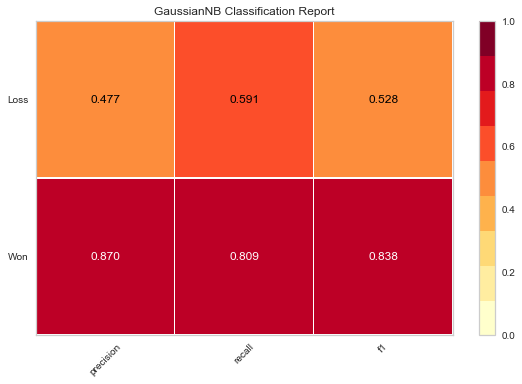

In [27]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['Won','Loss'])

visualizer.fit(data_train, target_train) # Fit the training data to the visualizer

visualizer.score(data_test, target_test) # Evaluate the model on the test data

g = visualizer.poof() # Draw/show/poof the data

In the code above, first we import the ClassificationReport class provided by the yellowbrick.classifier module. Next, an object visualizer of the type ClassificationReport is created. Here the first argument is the GaussianNB object gnb that was created while implementing the Naive-Bayes algorithm in the ‘Naive-Bayes’ section. The second argument contains the labels ‘Won’ and ‘Loss’ from the ‘Opportunity Result’ column from the sales_data dataframe.

Next, we use the fit() method to train the visualizer object. This is followed by the score() method, which uses gnb object to carry out predictions as per the GaussianNB algorithm and then calculate the accuracy score of the predictions made by this algorithm. Finally, we use the poof() method to draw a plot of the different scores for the GaussianNB algorithm. Notice how the different scores are laid out against each of the labels ‘Won’ and ‘Loss’; this enables us to visualize the scores across the different target classes.

LinearSVC

Similar to what we just did in the previous section, we can also plot the accuracy scores of the LinearSVC algorithm:

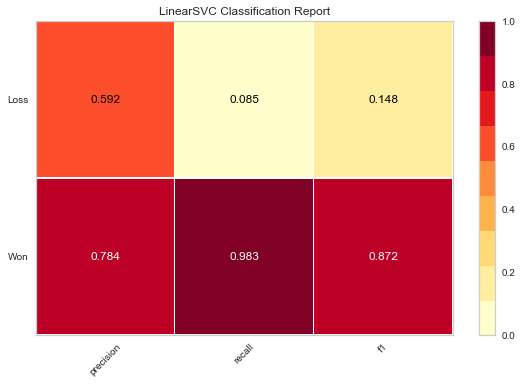

In [28]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['Won','Loss'])

visualizer.fit(data_train, target_train) # Fit the training data to the visualizer

visualizer.score(data_test, target_test) # Evaluate the model on the test data

g = visualizer.poof() # Draw/show/poof the data

In the code above, first we imported the ClassificationReport class provided by the yellowbrick.classifier module. Next, an object visualizer of the type ClassificationReport was created. Here the first argument is the LinearSVC object svc_model, that was created while implementing the LinearSVC algorithm in the ‘LinearSVC’ section. The second argument contains the labels ‘Won’ and ‘Loss’ from the ‘Opportunity Result’ column from the sales_data dataframe.

Next, we used the fit() method to train the ‘svc_model’ object. This is followed by the score() method which uses the svc_model object to carry out predictions according to the LinearSVC algorithm and then calculate the accuracy score of the predictions made by this algorithm. Finally, we used the poof() method to draw a plot of the different scores for the LinearSVC algorithm.

KNeighborsClassifier

Now, let’s do the same thing for the K-Neighbors Classifier scores.

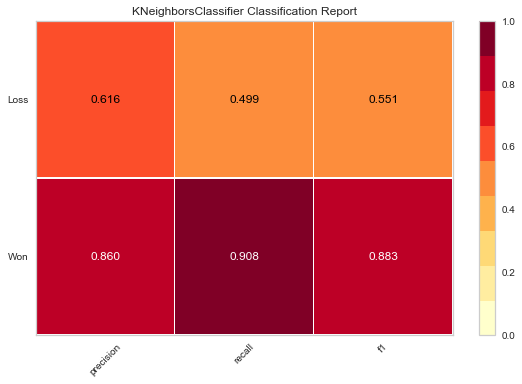

In [29]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['Won','Loss'])

visualizer.fit(data_train, target_train) # Fit the training data to the visualizer

visualizer.score(data_test, target_test) # Evaluate the model on the test data

g = visualizer.poof() # Draw/show/poof the data

Once again, we first import the ClassificationReport class provided by the yellowbrick.classifier module. Next, an object visualizer of the type ClassificationReport is created. Here the first argument is the KNeighborsClassifier object neigh, that was created while implementing the KNeighborsClassifier algorithm in the ‘KNeighborsClassifier’ section. The second argument contains the labels ‘Won’ and ‘Loss’ from the ‘Opportunity Result’ column from the sales_data dataframe.

Next, we use the fit() method to train the ‘neigh’ object. This is followed by the score() method which uses the neigh object to carry out predictions according to the KNeighborsClassifier algorithm and then calculate the accuracy score of the predictions made by this algorithm. Finally we use the poof() method to draw a plot of the different scores for the KNeighborsClassifier algorithm.

Now that we’ve visualized the results, it’s much easier for us to compare the scores and choose the algorithm that’s going to work best for our needs.

COnclusion:
    
    The scikit-learn library provides many different algorithms which can be imported into the code and then used to build models just like we would import any other Python library. This makes it easier to quickly build different models and compare these models to select the highest scoring one.